In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate
import scipy.special as special

In [2]:
a = -1.001
b = 1.001
h = 0.05
Lambda = 1
x=np.arange(a, b, h)

In [3]:
f = lambda x: 1
f1 = lambda x: x
f2 = lambda x: x*x

p1 = lambda x: 1
p2 = lambda x: x

y_exact=lambda x: 1+6*x*x

K = lambda x,s: x*x+x*s

In [4]:
def Galerkin_Petrov():
    aij = []
    bi = []

    aij.append([])   
    aij[0].append(integrate.quad(lambda t: f1(t)*p1(t), a, b)[0]-Lambda*integrate.dblquad(lambda t,s: (p1(t)*K(t,s)*f1(s)), a, b, lambda t:a, lambda t:b)[0])
    aij[0].append(integrate.quad(lambda t: f1(t)*p2(t), a, b)[0]-Lambda*integrate.dblquad(lambda t,s: (p2(t)*K(t,s)*f1(s)), a, b, lambda t:a, lambda t:b)[0])
    aij.append([])
    aij[1].append(integrate.quad(lambda t: f2(t)*p1(t), a, b)[0]-Lambda*integrate.dblquad(lambda t,s: (p1(t)*K(t,s)*f2(s)), a, b, lambda t:a, lambda t:b)[0])
    aij[1].append(integrate.quad(lambda t: f2(t)*p2(t), a, b)[0]-Lambda*integrate.dblquad(lambda t,s: (p2(t)*K(t,s)*f2(s)), a, b, lambda t:a, lambda t:b)[0])
 
    bi.append(Lambda*integrate.dblquad(lambda t,s: (p1(t)*K(t,s)*f(s)), a, b, lambda t:a, lambda t:b)[0])
    bi.append(Lambda*integrate.dblquad(lambda t,s: (p2(t)*K(t,s)*f(s)), a, b, lambda t:a, lambda t:b)[0])
    
    ci = np.linalg.solve(np.asarray(aij), np.asarray(bi))
    return ci

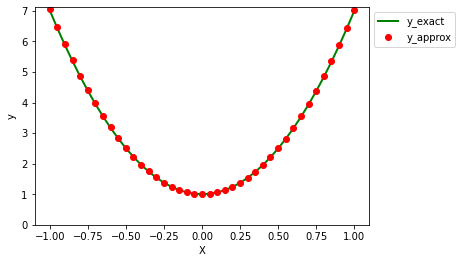

In [5]:
ci = Galerkin_Petrov()

y = y_exact(x)
y_approx = 1+ci[0]*f1(x)+ci[1]*f2(x)

plt.plot(x, y, '-g',linewidth=2, label='y_exact')
plt.plot(x, y_approx, 'or', label='y_approx')
plt.xlabel("X")
plt.ylabel("y")
plt.legend('l',fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylim([0,max(y)+0.1])
plt.show()

In [6]:
def Galerkin_Bubnov():
    aij = []
    bi = []

    aij.append([])   
    aij[0].append(integrate.quad(lambda t: f1(t)*f1(t), a, b)[0]-Lambda*integrate.dblquad(lambda t,s: (f1(t)*K(t,s)*f1(s)), a, b, lambda t:a, lambda t:b)[0])
    aij[0].append(integrate.quad(lambda t: f1(t)*f2(t), a, b)[0]-Lambda*integrate.dblquad(lambda t,s: (f1(t)*K(t,s)*f2(s)), a, b, lambda t:a, lambda t:b)[0])
    aij.append([])   
    aij[1].append(integrate.quad(lambda t: f2(t)*f1(t), a, b)[0]-Lambda*integrate.dblquad(lambda t,s: (f2(t)*K(t,s)*f1(s)), a, b, lambda t:a, lambda t:b)[0])
    aij[1].append(integrate.quad(lambda t: f2(t)*f2(t), a, b)[0]-Lambda*integrate.dblquad(lambda t,s: (f2(t)*K(t,s)*f2(s)), a, b, lambda t:a, lambda t:b)[0])
 
    bi.append(Lambda*integrate.dblquad(lambda t,s: (f1(t)*K(t,s)*f(s)), a, b, lambda t:a, lambda t:b)[0])
    bi.append(Lambda*integrate.dblquad(lambda t,s: (f2(t)*K(t,s)*f(s)), a, b, lambda t:a, lambda t:b)[0])
    
    ci = np.linalg.solve(np.asarray(aij), np.asarray(bi))
    return ci

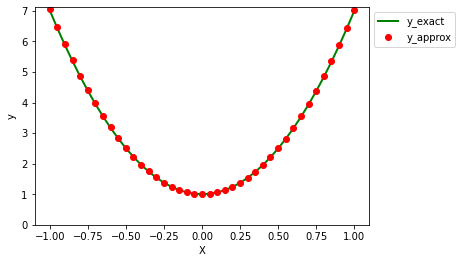

In [7]:
ci = Galerkin_Bubnov()

y = y_exact(x)
y_approx = 1+ci[0]*f1(x)+ci[1]*f2(x)

plt.plot(x, y, '-g',linewidth=2, label='y_exact')
plt.plot(x, y_approx, 'or', label='y_approx')
plt.xlabel("X")
plt.ylabel("y")
plt.legend('l',fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylim([0,max(y)+0.1])
plt.show()